In [1]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima_model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math 
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

In [2]:
df=pd.read_csv("TSLA.csv")

In [3]:
 df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [4]:
stock_df= df[["Date", "Close"]]

In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [6]:
stock_df.Date=pd.to_datetime(stock_df.Date)

In [7]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [8]:
stock_data=stock_df.set_index("Date")

In [9]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


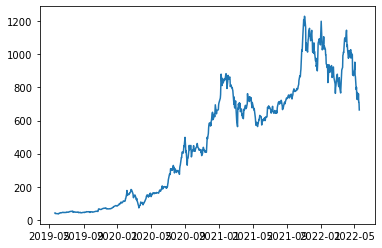

In [10]:
plt.plot(stock_data["Close"])

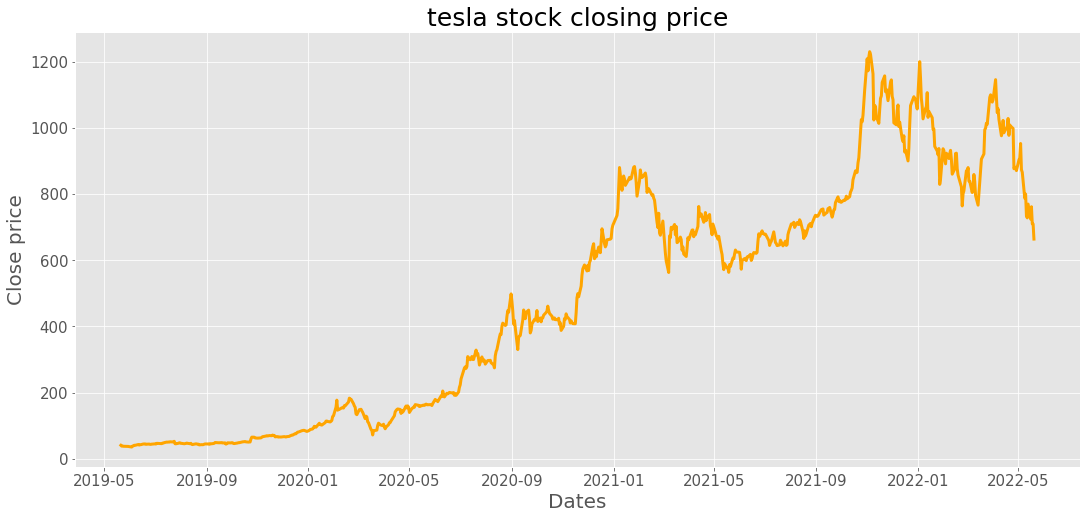

In [11]:
##ploting close price
plt.style.use("ggplot")
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates", fontsize= 20)
plt.xticks(fontsize=15)
plt.ylabel("Close price", fontsize= 20)
plt.yticks(fontsize= 15)
plt.plot(stock_data["Close"], linewidth = 3, color= "orange")
plt.title("tesla stock closing price", fontsize= 25)
plt.show()

<AxesSubplot:xlabel='Close', ylabel='Density'>

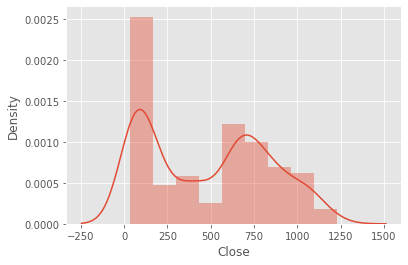

In [12]:
## checking for distribution
sns.distplot(stock_data["Close"])

<AxesSubplot:xlabel='Close'>

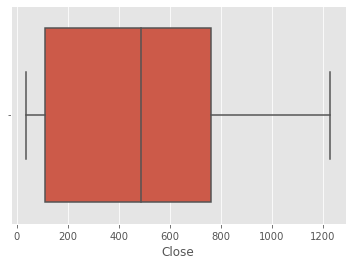

In [13]:
## checking for outlier
sns.boxplot(stock_data["Close"])

In [14]:
result=seasonal_decompose(stock_data["Close"], period =30)

In [15]:
result.seasonal

Date
2019-05-21    2.317701
2019-05-22    8.439826
2019-05-23    6.163890
2019-05-24    7.817719
2019-05-28    6.539408
                ...   
2022-05-16    7.817719
2022-05-17    6.539408
2022-05-18    1.508873
2022-05-19   -4.468046
2022-05-20   -1.826385
Name: seasonal, Length: 758, dtype: float64

In [16]:
result.trend.isnull().sum()

30

In [17]:
result.resid.isnull().sum()

30

In [18]:
result.observed

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

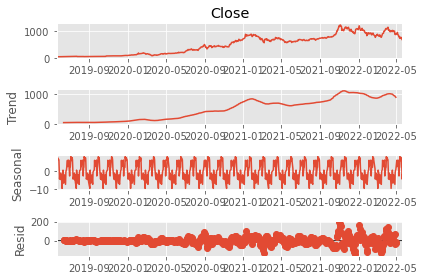

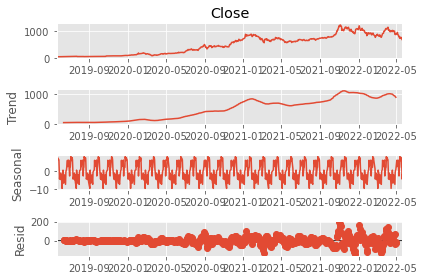

In [19]:
result.plot()

<Figure size 1296x576 with 0 Axes>

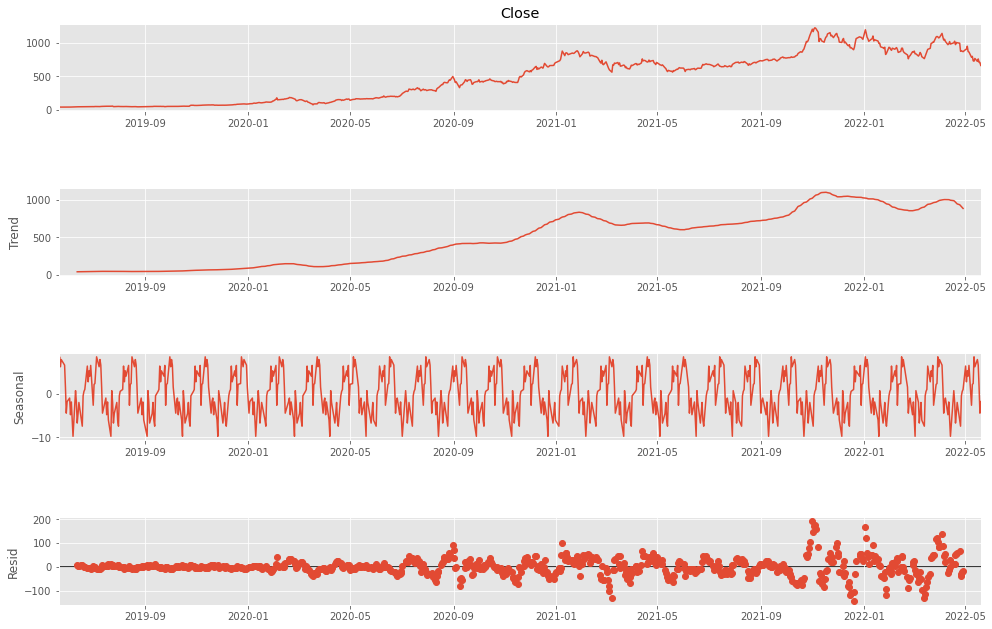

In [20]:
## plot for additive time series
fig = plt.figure(figsize=(18,8))
fig = result.plot()
fig.set_size_inches(16,10)

<Figure size 1296x576 with 0 Axes>

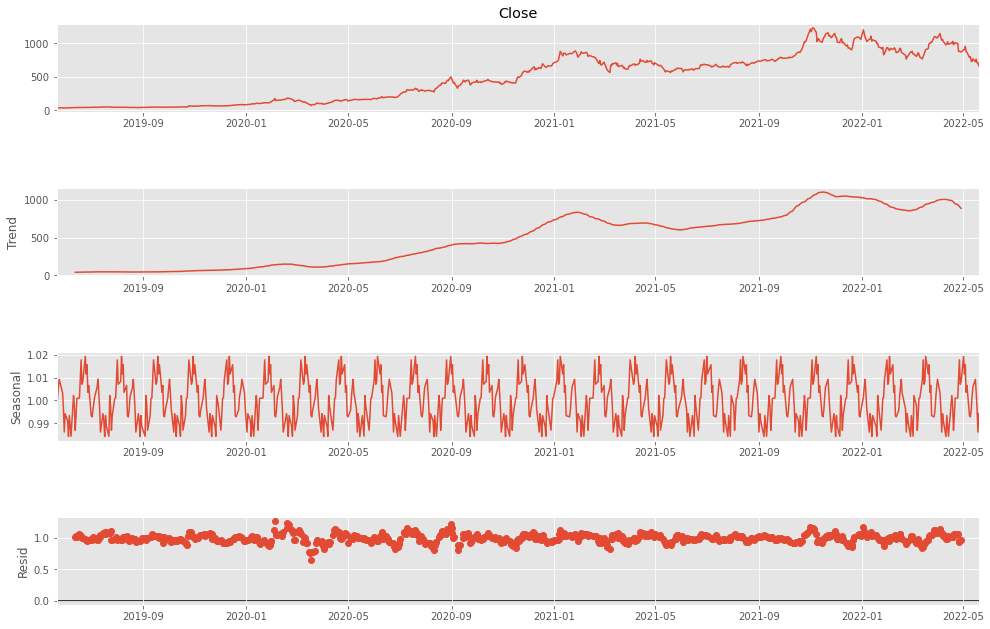

In [21]:
## plot for the multiplicative time series
result= seasonal_decompose(stock_data["Close"], model = "multiplicative", period=30)
fig = plt.figure(figsize=(18,8))
fig = result.plot()
fig.set_size_inches(16,10)

In [22]:
# this fucntion for checking Test for staionarity 
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

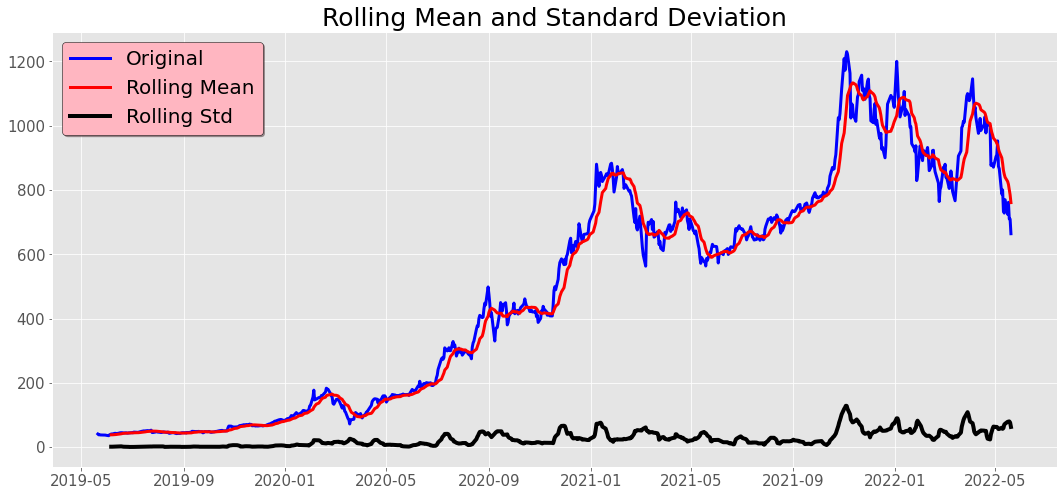

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [23]:
test_stationarity(stock_data["Close"])

In [24]:
## differencing method for convert non-stationry data to stationary data
df_close= stock_data["Close"]

In [25]:
diff_1=df_close.diff()

In [26]:
diff_1.dropna(inplace=True)

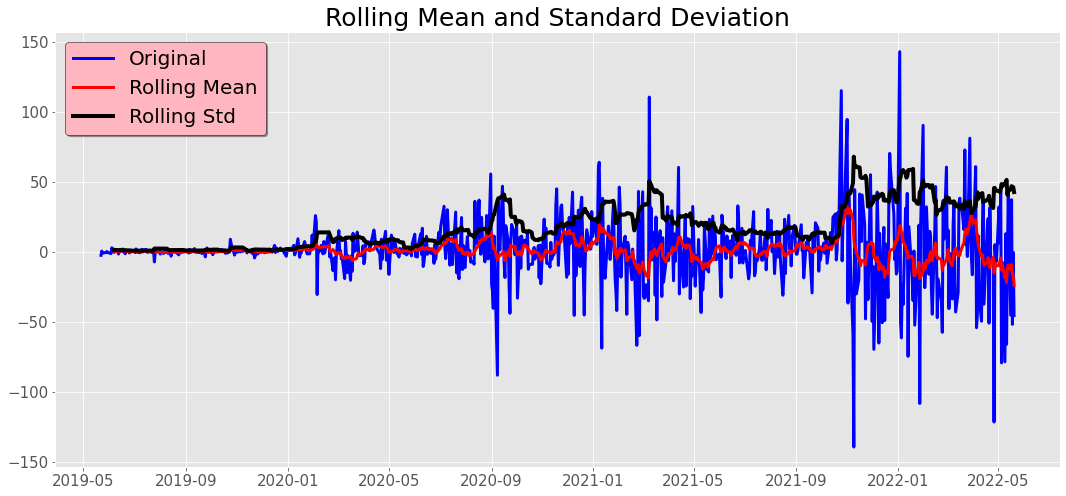

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [27]:
test_stationarity(diff_1 )

# ARIMA

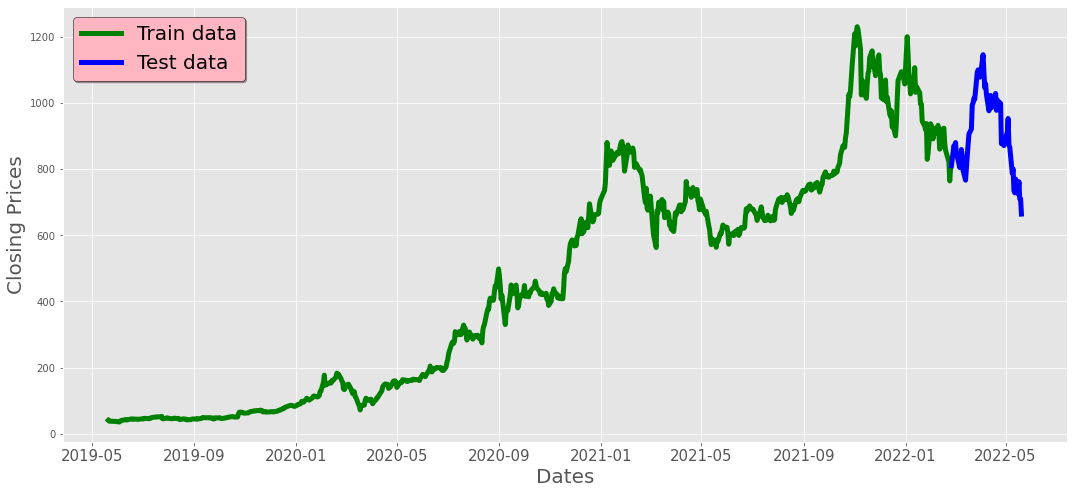

In [28]:
#split data into train and training set
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

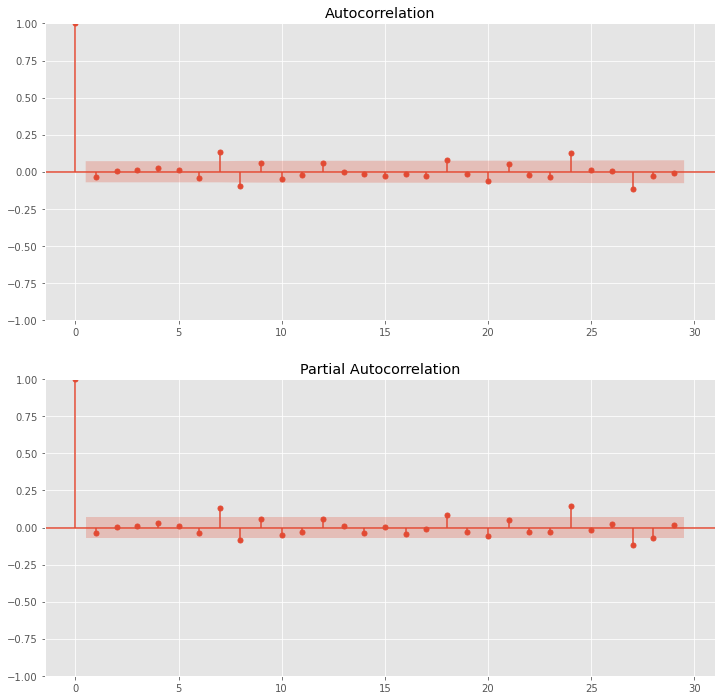

In [29]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(diff_1, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(diff_1, ax=ax2)

In [30]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [31]:
df_diff= df_close.diff()

In [32]:
df= pd.concat([df_close, df_diff], axis=1)

In [33]:
df.dropna(inplace = True)

In [34]:
df.corr()

,Close,Close
Close,1.000000,0.021151
Close,0.021151,1.000000


In [35]:
train_data

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-02-17    876.349976
2022-02-18    856.979980
2022-02-22    821.530029
2022-02-23    764.039978
2022-02-24    800.770020
Name: Close, Length: 698, dtype: float64

In [36]:
test_data

Date
2022-02-25     809.869995
2022-02-28     870.429993
2022-03-01     864.369995
2022-03-02     879.890015
2022-03-03     839.289978
2022-03-04     838.289978
2022-03-07     804.580017
2022-03-08     824.400024
2022-03-09     858.969971
2022-03-10     838.299988
2022-03-11     795.349976
2022-03-14     766.369995
2022-03-15     801.890015
2022-03-16     840.229980
2022-03-17     871.599976
2022-03-18     905.390015
2022-03-21     921.159973
2022-03-22     993.979980
2022-03-23     999.109985
2022-03-24    1013.919983
2022-03-25    1010.640015
2022-03-28    1091.839966
2022-03-29    1099.569946
2022-03-30    1093.989990
2022-03-31    1077.599976
2022-04-01    1084.589966
2022-04-04    1145.449951
2022-04-05    1091.260010
2022-04-06    1045.760010
2022-04-07    1057.260010
2022-04-08    1025.489990
2022-04-11     975.929993
2022-04-12     986.950012
2022-04-13    1022.369995
2022-04-14     985.000000
2022-04-18    1004.289978
2022-04-19    1028.150024
2022-04-20     977.200012
2022-04

In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [38]:
model = ARIMA(train_data, order=(1,1,0))

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
model_fit =model.fit()

In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  698
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3150.457
Date:                Tue, 24 Jan 2023   AIC                           6304.913
Time:                        13:51:22   BIC                           6314.007
Sample:                             0   HQIC                          6308.429
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0274      0.025     -1.102      0.270      -0.076       0.021
sigma2       494.5118     11.694     42.287      0.000     471.591     517.432
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2107.32
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              31.77   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
y_pre=model_fit.forecast()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
y_pre

698    799.762897
dtype: float64

In [43]:
y_true= test_data[0]

In [44]:
y_true

809.8699951171875

In [45]:
mean_squared_error([y_true],[y_pre])

102.15343278745819

In [46]:
mean_absolute_error([y_true],[y_pre])

10.107098138806123

In [47]:
def evaluate_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [48]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [49]:
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

In [50]:
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.163
ARIMA(0, 0, 2) RMSE=163.890
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.579
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.581
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.634
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.738
Best ARIMA(2, 0, 0) RMSE=39.440


In [53]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order= (p,d,q)
            print(order)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)


In [54]:
model = ARIMA(train_data, order=(2,2,0))

In [55]:
model_fit =model.fit()

In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  698
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -3244.040
Date:                Tue, 24 Jan 2023   AIC                           6494.081
Time:                        14:06:44   BIC                           6507.717
Sample:                             0   HQIC                          6499.353
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6884      0.021    -32.923      0.000      -0.729      -0.647
ar.L2         -0.3833      0.025    -15.500      0.000      -0.432      -0.335
sigma2       654.0731     16.992     38.493      0.000     620.769     687.377
===================================================================================
Ljung-Box (L1) (Q):                   6.61   Jarque-Bera (JB):              1382.81
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              34.47   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
y_pre=model_fit.forecast(steps=60)

In [58]:
y_pre

698    781.088170
699    764.127596
700    766.914593
701    755.064798
702    745.722064
703    740.263327
704    731.170053
705    723.090109
706    715.705609
707    707.454004
708    699.532755
709    691.716429
710    683.701261
711    675.782758
712    667.873923
713    659.921384
714    651.995225
715    644.067656
716    636.130947
717    628.201071
718    620.269994
719    612.337125
720    604.405950
721    596.474295
722    588.542321
723    580.610751
724    572.679026
725    564.747252
726    556.815571
727    548.883845
728    540.952115
729    533.020404
730    525.088682
731    517.156960
732    509.225243
733    501.293522
734    493.361802
735    485.430082
736    477.498362
737    469.566642
738    461.634922
739    453.703202
740    445.771483
741    437.839763
742    429.908043
743    421.976323
744    414.044603
745    406.112883
746    398.181163
747    390.249443
748    382.317723
749    374.386004
750    366.454284
751    358.522564
752    350.590844
753    342

In [59]:
y_true= test_data

In [60]:
y_true

Date
2022-02-25     809.869995
2022-02-28     870.429993
2022-03-01     864.369995
2022-03-02     879.890015
2022-03-03     839.289978
2022-03-04     838.289978
2022-03-07     804.580017
2022-03-08     824.400024
2022-03-09     858.969971
2022-03-10     838.299988
2022-03-11     795.349976
2022-03-14     766.369995
2022-03-15     801.890015
2022-03-16     840.229980
2022-03-17     871.599976
2022-03-18     905.390015
2022-03-21     921.159973
2022-03-22     993.979980
2022-03-23     999.109985
2022-03-24    1013.919983
2022-03-25    1010.640015
2022-03-28    1091.839966
2022-03-29    1099.569946
2022-03-30    1093.989990
2022-03-31    1077.599976
2022-04-01    1084.589966
2022-04-04    1145.449951
2022-04-05    1091.260010
2022-04-06    1045.760010
2022-04-07    1057.260010
2022-04-08    1025.489990
2022-04-11     975.929993
2022-04-12     986.950012
2022-04-13    1022.369995
2022-04-14     985.000000
2022-04-18    1004.289978
2022-04-19    1028.150024
2022-04-20     977.200012
2022-04

In [61]:
np.sqrt(mean_squared_error([y_true],[y_pre]))

397.9811962943058

In [62]:
np.sqrt(mean_absolute_error([y_true],[y_pre]))

19.08612690230087

In [68]:
history =[x for x in train_data]
prediction= list()
for t in range(len(test_data)):
    model = ARIMA(history,order= (2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha=0.05)
    prediction.append(fc)
    history.append(test_data[t])
print(np.sqrt(mean_squared_error(test_data, prediction)))   

39.43992426506011


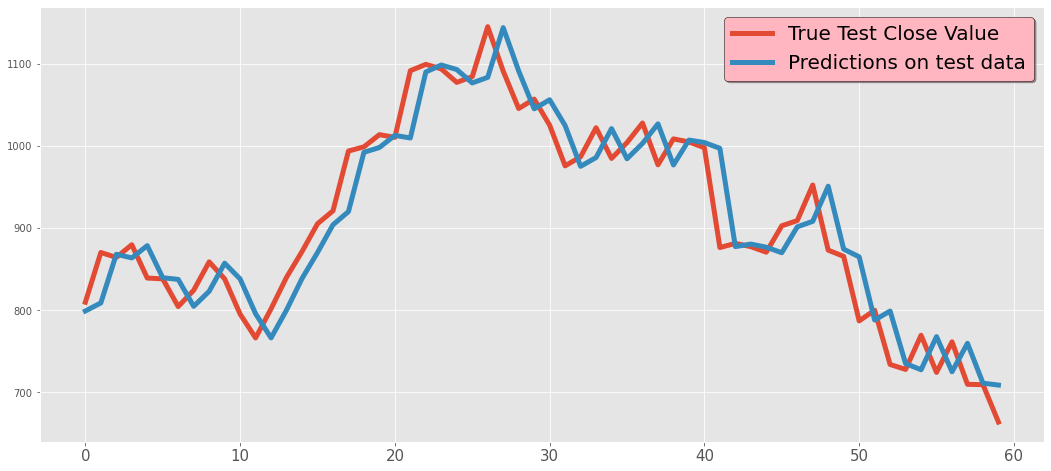

In [71]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(prediction)), prediction, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

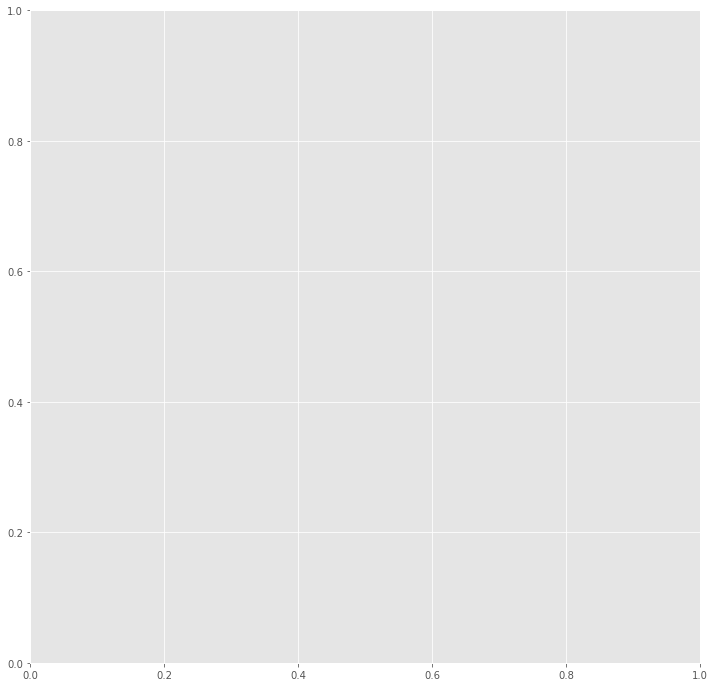

In [73]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
model_fit.plot_predict(start=1, end= len(df_close)+60, ax=ax1)
plt.grid("both")
plt.legend(["forecast", "Close", "95% confidence interval"], fontsize= 20, shadow = True, facecolor = lightblue, edgecolor = "k")
plt.show()

In [ ]:
# Make as pandas series
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()